# Introduction
In this notebook, we are using the Keras API in Tensorflow 2.X to build an image classifier to recognize Handwritten digits using the Mnist data.

# Loading Tensorflow and checking the version

In [1]:
import tensorflow as tf
print(tf.__version__)

2.7.0


- If not installed, uncomment the following cell. 
- **PS:** using pip not conda as everything on colab is prepared for you (cuda).

In [2]:
#!pip install tensorflow==2.5.0 

# Data Loading and exploring

In [3]:
from tensorflow.keras.datasets import mnist

(training_images, training_labels),(testing_images, testing_labels) = mnist.load_data()

In [4]:
print("The number of training images is {}".format(training_images.shape[0]))
print("The number of testing images is {}".format(testing_images.shape[0]))
print(
    "The shape of an image is {}X{}".format(
        training_images.shape[1], training_images.shape[2]
    )
)


The number of training images is 60000
The number of testing images is 10000
The shape of an image is 28X28


In [5]:
import numpy as np
import random
np.set_printoptions(linewidth=200)
import matplotlib.pyplot as plt

9


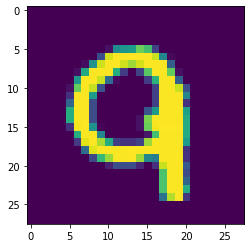

In [6]:
img_number = random.randint(0, training_images.shape[0])
plt.imshow(training_images[img_number])
print(training_labels[img_number])

All of the pixels values are between 0 and 255. If we are training a neural network, for various reasons it's easier that all values are between 0 and 1.

This can be done using `normalizing`

In [7]:
training_images  = training_images / 255.0
testing_images = testing_images / 255.0

# Defining the model using **Sequential** API

In [8]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten


In [9]:
model = Sequential(
    [
        Flatten(input_shape=(28, 28)),
        Dense(128, activation=tf.nn.relu),
        Dense(10, activation=tf.nn.softmax),
    ]
)


2022-01-25 19:03:18.739781: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-01-25 19:03:18.751421: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-01-25 19:03:18.751828: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-01-25 19:03:18.752559: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


Define the **optimizer** and the **loss**

In [11]:
model.compile(
    optimizer=tf.optimizers.Adam(),
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"],
)


Train the model

In [12]:
model.fit(training_images, training_labels, epochs=5)


Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2595 - accuracy: 0.9258
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1136 - accuracy: 0.9665
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0778 - accuracy: 0.9771
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0586 - accuracy: 0.9826
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0447 - accuracy: 0.9866


Evaluate the model on the test images

In [13]:
evaluation = model.evaluate(testing_images, testing_labels)
print("Accuracy on the testing images is {}".format(evaluation[1]*100))

313/313 [==============================] - 1s 2ms/step - loss: 0.0755 - accuracy: 0.9777
Accuracy on the testing images is 97.76999950408936


# Defining the model using **Functional** API

In [14]:
from tensorflow.keras import Model, Input
from tensorflow.keras.layers import Dense, Flatten

In [15]:
inputs  = Input(shape=(28,28))
x       = Flatten()(inputs)
x       = Dense(128, activation=tf.nn.relu)(x)
outputs = Dense(10, activation=tf.nn.softmax)(x)

model_func = Model(inputs=inputs, outputs=outputs)

In [16]:
model_func.compile(
    optimizer=tf.optimizers.Adam(),
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"],
)


In [17]:
model_func.fit(training_images, training_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2593 - accuracy: 0.9252
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1157 - accuracy: 0.9659
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0795 - accuracy: 0.9762
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0585 - accuracy: 0.9822
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0438 - accuracy: 0.9869


In [18]:
evaluation = model_func.evaluate(testing_images, testing_labels)
print("Accuracy on the testing images is {}".format(evaluation[1]*100))

313/313 [==============================] - 1s 2ms/step - loss: 0.0785 - accuracy: 0.9752
Accuracy on the testing images is 97.51999974250793
